<h1><font color="black">ECE 2372: HW2</font></h1>

<h2><font color="black">Initialize Data</font></h2>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import random
import math

# Load MATLAB file data
mat_data1 = scipy.io.loadmat('synthetic1.mat')
mat_data2 = scipy.io.loadmat('synthetic2.mat')
mat_data3 = scipy.io.loadmat('synthetic3.mat')
mat_data4 = scipy.io.loadmat('synthetic4.mat')
mat_datatest = scipy.io.loadmat('testLDA.mat')
mat_datatrain = scipy.io.loadmat('trainTrain.mat')

# Access variables in the MATLAB files
X1 = mat_data1['X']
Y1 = mat_data1['Y']

X2 = mat_data2['X']
Y2 = mat_data2['Y']
w = mat_data2['w']
b = mat_data2['b']

X3 = mat_data3['X']
Y3 = mat_data3['Y']

X4 = mat_data4['X']
Y4 = mat_data4['Y']

Xtest = mat_datatest['Xtest']
Ytest = mat_datatest['Ytest']

Xtrain = mat_datatrain['Xtrain']
Ytrain = mat_datatrain['Ytrain']

<h2><font color="black">Plot the Initial Synthetic Data</font></h2>

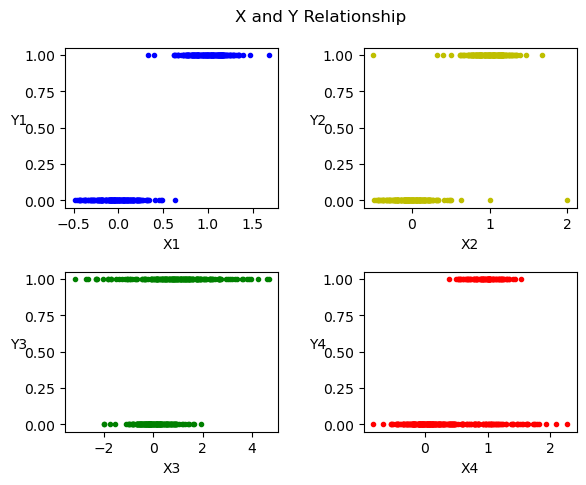

In [4]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle('X and Y Relationship')
Y1 = Y1.ravel()
Y2 = Y2.ravel()
Y3 = Y3.ravel()
Y4 = Y4.ravel()
for i in range(2):
    axs[0, 0].plot(X1[i],Y1,'b.')
    axs[0, 0].set_xlabel('X1')
    axs[0, 0].set_ylabel('Y1', rotation=0)
    axs[0, 1].plot(X2[i],Y2,'y.')
    axs[0, 1].set_xlabel('X2')
    axs[0, 1].set_ylabel('Y2', rotation=0)
    axs[1, 0].plot(X3[i],Y3,'g.')
    axs[1, 0].set_xlabel('X3')
    axs[1, 0].set_ylabel('Y3', rotation=0)
    axs[1, 1].plot(X4[i],Y4,'r.')
    axs[1, 1].set_xlabel('X4')
    axs[1, 1].set_ylabel('Y4', rotation=0)

plt.show()

<h2><font color="black">LDA Recapitulation</font></h2>

Error for synthetic 1: 100.0
Error for synthetic 1 modified: 100.0


Error for synthetic 2: 98.5
Error for synthetic 2 modified: 99.0


Error for synthetic 3: 82.0
Error for synthetic 3 modified: 79.0


Error for synthetic 4: 67.5
Error for synthetic 4 modified: 60.5


Error for training/test set: 53.67965367965368
Error for training/test set: 56.27705627705628


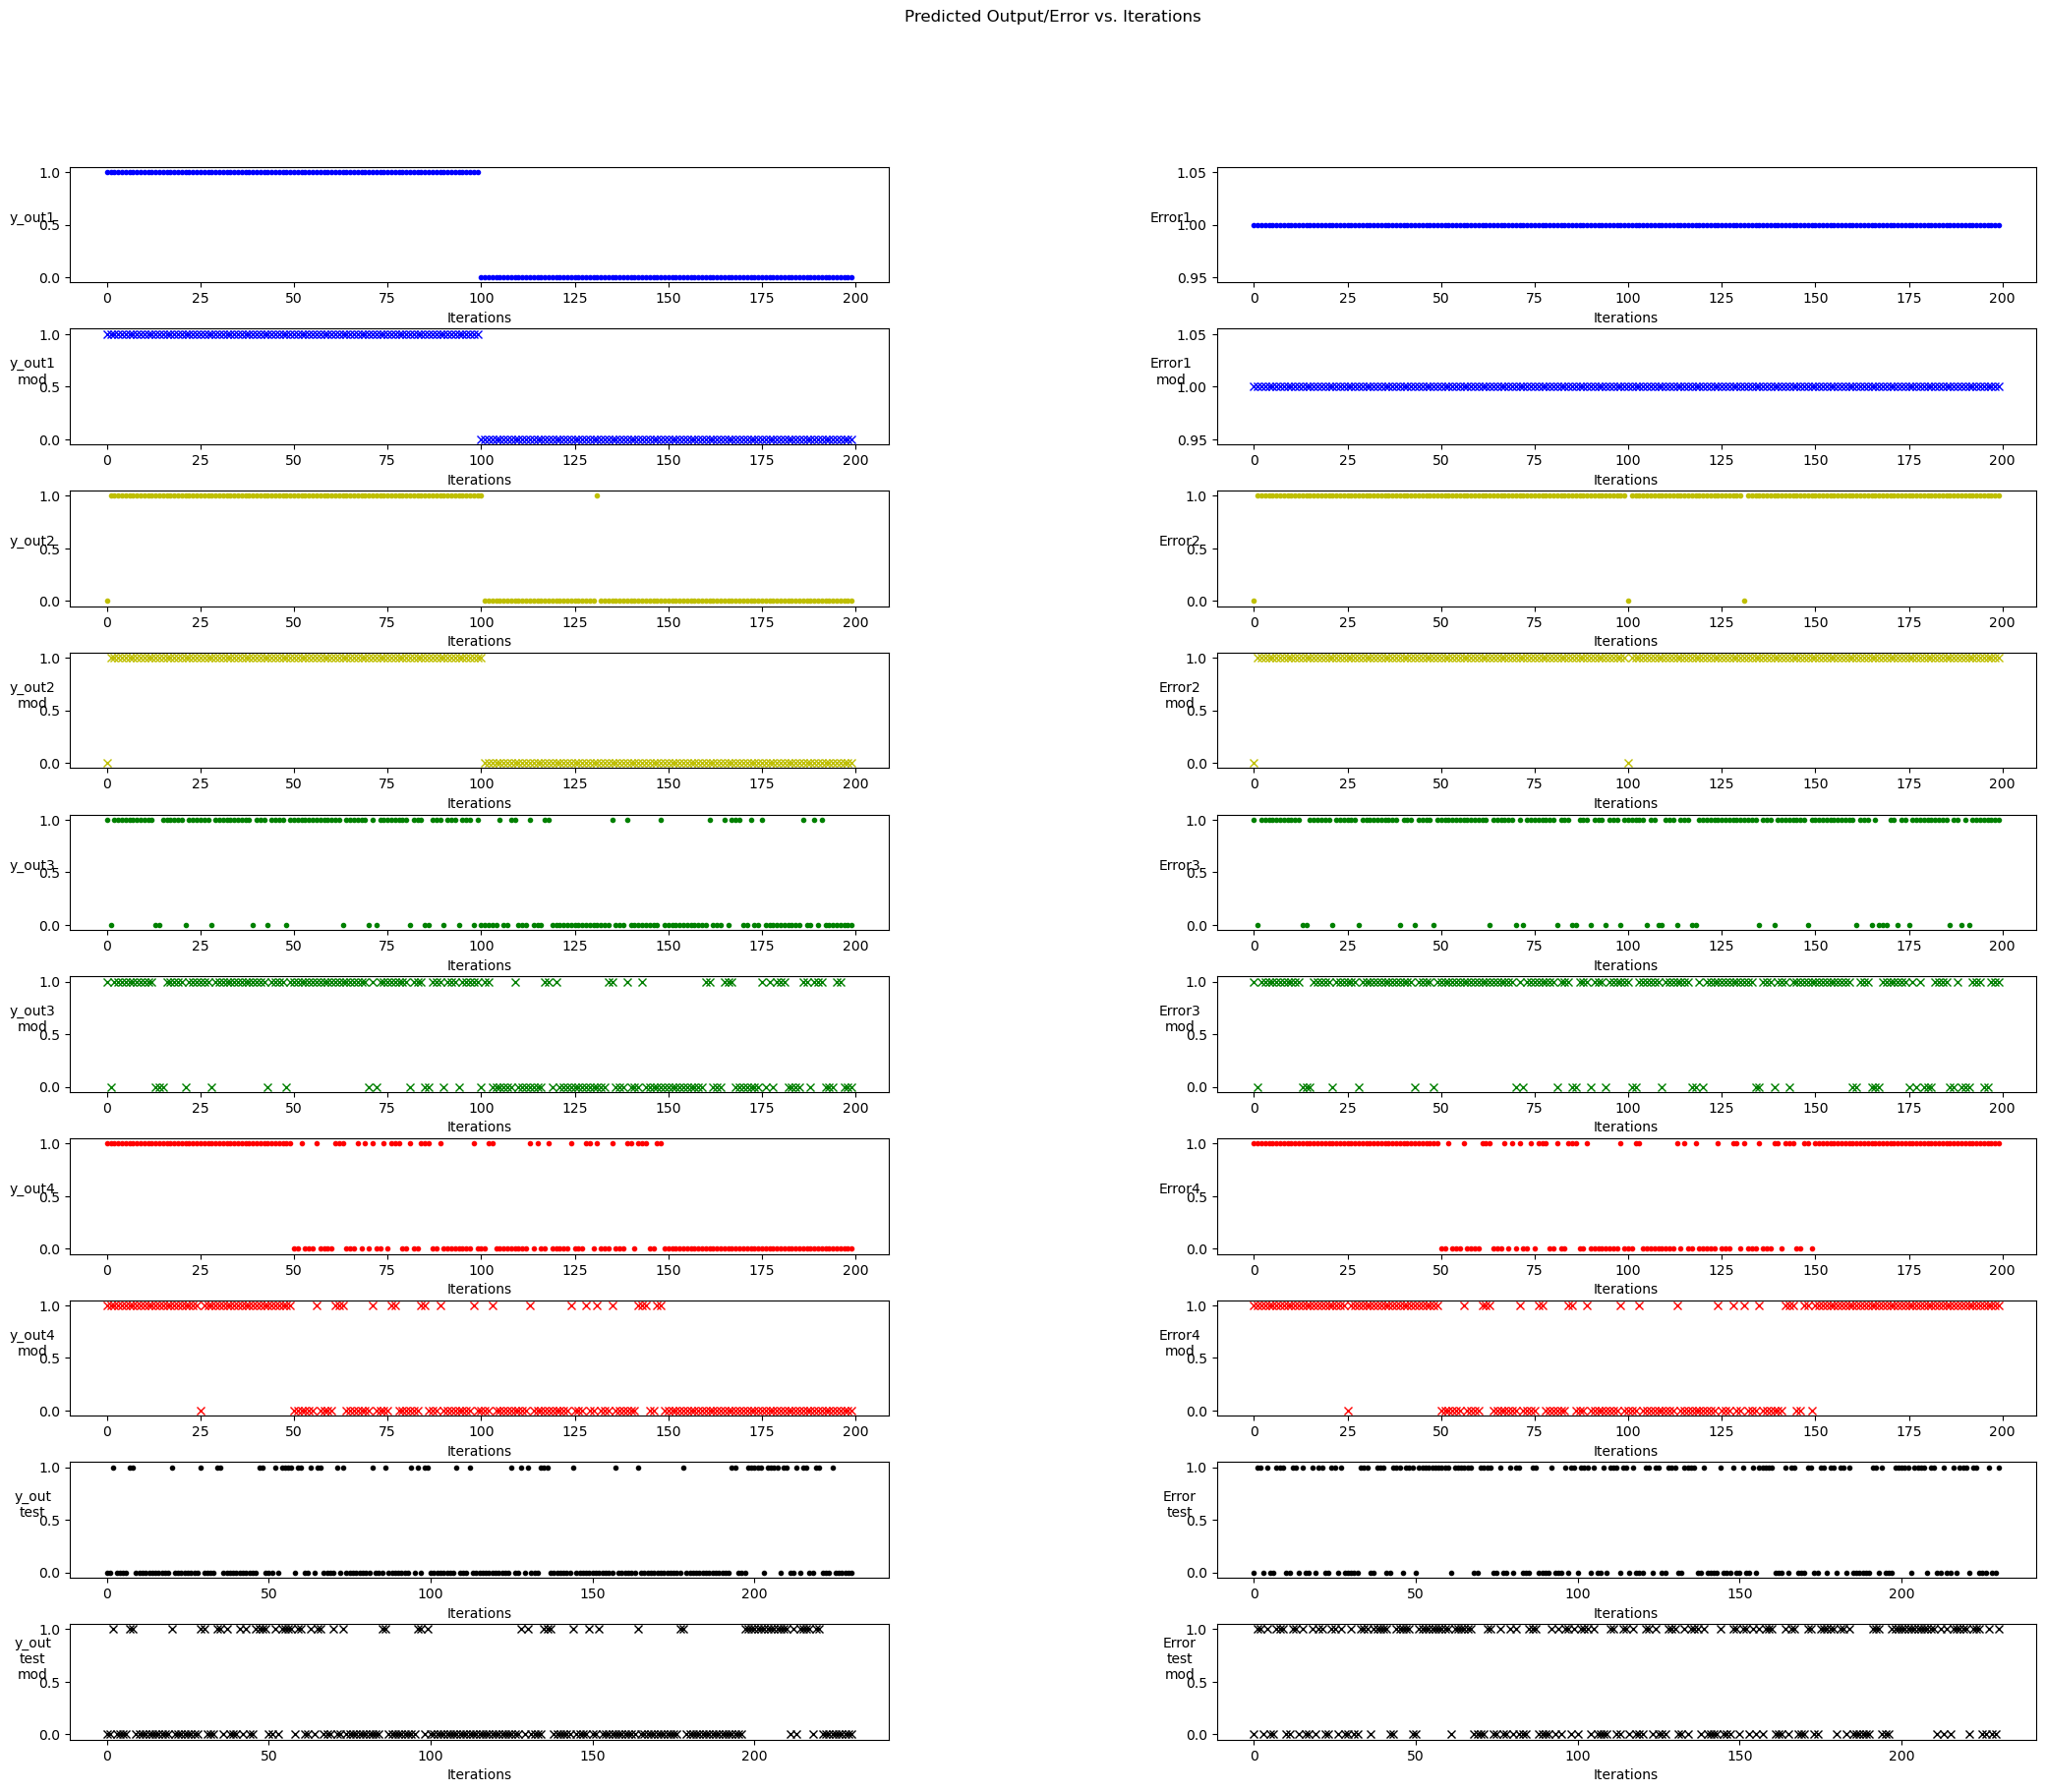

In [5]:
class LinearDiscriminantAnalysis:
    def __init__(self):
        self.mean_0 = None
        self.mean_1 = None
        self.prior_0 = None
        self.prior_1 = None
        self.shared_cov = None
        self.a = None
        self.b = None

    # We want to compute (a^T)*x + b < 0,0,1
    def fit(self, X, Y):
        # Reshape Y to ensure it has the correct shape
        Y = Y.ravel()
        # Compute the prior probabilities
        self.prior_0 = X[:, Y == 0]
        self.prior_1 = X[:, Y == 1]
        self.prior_0 = self.prior_0.T
        self.prior_1 = self.prior_1.T

        # Compute means
        self.mean_0 = np.mean(self.prior_0, axis=0)
        self.mean_1 = np.mean(self.prior_1, axis=0)

        # Compute covariance matrix
        cov_0 = np.cov(self.prior_0.T)
        cov_1 = np.cov(self.prior_1.T)
        self.shared_cov = (cov_0 + cov_1)

        # Compute a
        self.a = np.dot(np.linalg.inv(self.shared_cov), (self.mean_0 - self.mean_1))

        # Compute b, where @ is the np.matmul operator
        b1 = -0.5 * self.mean_0.T @ np.linalg.inv(self.shared_cov) @ self.mean_0
        b2 = 0.5 * self.mean_1.T @ np.linalg.inv(self.shared_cov) @ self.mean_1
        b3 = np.log(len(self.prior_1) / len(self.prior_0))
        self.b = b1 + b2 + b3

    def fit_modified(self, X, Y):
        # Reshape Y to ensure it has the correct shape
        Y = Y.ravel()
        # Compute the prior probabilities
        self.prior_0 = X[:, Y == 0]
        self.prior_1 = X[:, Y == 1]
        self.prior_0 = self.prior_0.T
        self.prior_1 = self.prior_1.T

        # Compute means
        self.mean_0 = np.mean(self.prior_0, axis=0)
        self.mean_1 = np.mean(self.prior_1, axis=0)

        # Compute covariance matrix and modify to structures covariance
        d = X.shape[0]
        cov_0 = np.cov(self.prior_0.T)
        cov_1 = np.cov(self.prior_1.T)
        trace_cov = np.trace(cov_0 + cov_1)
        sigma_squared = trace_cov / d
        self.shared_cov = sigma_squared * np.eye(d)

        # Compute a
        self.a = np.dot(np.linalg.inv(self.shared_cov), (self.mean_0 - self.mean_1))

        # Compute b, where @ is the np.matmul operator
        b1 = -0.5 * (self.mean_0.T @ np.linalg.inv(self.shared_cov) @ self.mean_0)
        b2 = 0.5 * (self.mean_1.T @ np.linalg.inv(self.shared_cov) @ self.mean_1)
        b3 = np.log(len(self.prior_1) / len(self.prior_0))
        self.b = b1 + b2 + b3

    def predict(self, X):
        y_out = (X.T @ self.a) + self.b
        return np.where(y_out >= 0, 1, 0)

# Main method
if __name__ == "__main__":
    # Set up plots
    fig, axs = plt.subplots(10, 2, figsize=(25,20))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('Predicted Output/Error vs. Iterations')
    
    # Use LDA model
    lda = LinearDiscriminantAnalysis()
    
    '''Synthetic 1 Start'''
    lda.fit(X1, Y1)
    y_out = lda.predict(X1)
    # Calculate error for LDA
    error = y_out != Y1
    percent_error = np.mean(error)*100
    print("Error for synthetic 1:", percent_error)
    
    # Plot 1
    axs[0, 0].set_ylabel('y_out1', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(200), y_out, 'b.')
    axs[0, 1].set_ylabel('Error1', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(200), error, 'b.')

    lda.fit_modified(X1, Y1)
    y_out =lda.predict(X1)
    # Calculate error for modified LDA
    error = y_out != Y1
    percent_error = np.mean(error)*100
    print("Error for synthetic 1 modified:", percent_error)
    print("\n")
    
    # Plot 1 modified
    axs[1, 0].set_ylabel('y_out1\nmod', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(200), y_out, 'bx')
    axs[1, 1].set_ylabel('Error1\nmod', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(200), error, 'bx')
    '''Synthetic 1 End'''

    '''Synthetic 2 Start'''
    lda.fit(X2, Y2)
    y_out = lda.predict(X2)
    # Calculate error for LDA
    error = y_out != Y2
    percent_error = np.mean(error)*100
    print("Error for synthetic 2:", percent_error)
    
    # Plot 2
    axs[2, 0].set_ylabel('y_out2', rotation=0)
    axs[2, 0].set_xlabel('Iterations')
    axs[2, 0].plot(range(200), y_out, 'y.')
    axs[2, 1].set_ylabel('Error2', rotation=0)
    axs[2, 1].set_xlabel('Iterations')
    axs[2, 1].plot(range(200), error, 'y.')

    lda.fit_modified(X2, Y2)
    y_out = lda.predict(X2)
    # Calculate error for modified LDA
    error = y_out != Y2
    percent_error = np.mean(error)*100
    print("Error for synthetic 2 modified:", percent_error)
    print("\n")
    
    # Plot 2 modified
    axs[3, 0].set_ylabel('y_out2\nmod', rotation=0)
    axs[3, 0].set_xlabel('Iterations')
    axs[3, 0].plot(range(200), y_out, 'yx')
    axs[3, 1].set_ylabel('Error2\nmod', rotation=0)
    axs[3, 1].set_xlabel('Iterations')
    axs[3, 1].plot(range(200), error, 'yx')
    '''Synthetic 2 End'''

    '''Synthetic 3 Start'''
    lda.fit(X3, Y3)
    y_out = lda.predict(X3)
    # Calculate error for LDA
    error = y_out != Y3
    percent_error = np.mean(error)*100
    print("Error for synthetic 3:", percent_error)
    
    # Plot 3
    axs[4, 0].set_ylabel('y_out3', rotation=0)
    axs[4, 0].set_xlabel('Iterations')
    axs[4, 0].plot(range(200), y_out, 'g.')
    axs[4, 1].set_ylabel('Error3', rotation=0)
    axs[4, 1].set_xlabel('Iterations')
    axs[4, 1].plot(range(200), error, 'g.')

    lda.fit_modified(X3, Y3)
    y_out = lda.predict(X3)
    # Calculate error for modified LDA
    error = y_out != Y3
    percent_error = np.mean(error)*100
    print("Error for synthetic 3 modified:", percent_error)
    print("\n")
    
    # Plot 3 modified
    axs[5, 0].set_ylabel('y_out3\nmod', rotation=0)
    axs[5, 0].set_xlabel('Iterations')
    axs[5, 0].plot(range(200), y_out, 'gx')
    axs[5, 1].set_ylabel('Error3\nmod', rotation=0)
    axs[5, 1].set_xlabel('Iterations')
    axs[5, 1].plot(range(200), error, 'gx')
    '''Synthetic 3 End'''

    '''Synthetic 4 Start'''
    lda.fit(X4, Y4)
    y_out = lda.predict(X4)
    # Calculate error for LDA
    error = y_out != Y4
    percent_error = np.mean(error)*100
    print("Error for synthetic 4:", percent_error)
    
    # Plot 4
    axs[6, 0].set_ylabel('y_out4', rotation=0)
    axs[6, 0].set_xlabel('Iterations')
    axs[6, 0].plot(range(200), y_out, 'r.')
    axs[6, 1].set_ylabel('Error4', rotation=0)
    axs[6, 1].set_xlabel('Iterations')
    axs[6, 1].plot(range(200), error, 'r.')

    lda.fit_modified(X4, Y4)
    y_out = lda.predict(X4)
    # Calculate error for modified LDA
    error = y_out != Y4
    percent_error = np.mean(error)*100
    print("Error for synthetic 4 modified:", percent_error)
    print("\n")
    
    # Plot 4 modified
    axs[7, 0].set_ylabel('y_out4\nmod', rotation=0)
    axs[7, 0].set_xlabel('Iterations')
    axs[7, 0].plot(range(200), y_out, 'rx')
    axs[7, 1].set_ylabel('Error4\nmod', rotation=0)
    axs[7, 1].set_xlabel('Iterations')
    axs[7, 1].plot(range(200), error, 'rx')
    '''Synthetic 4 End'''

    '''Test/Train Start'''
    lda.fit(Xtrain, Ytrain)
    y_out = lda.predict(Xtest)
    # Calculate error for LDA
    error = y_out != Ytest
    percent_error = np.mean(error)*100
    print("Error for training/test set:", percent_error)
    error = np.transpose(error)
    
    # Plot Train/Test
    axs[8, 0].set_ylabel('y_out\ntest', rotation=0)
    axs[8, 0].set_xlabel('Iterations')
    axs[8, 0].plot(range(231), y_out, 'k.')
    axs[8, 1].set_ylabel('Error\ntest', rotation=0)
    axs[8, 1].set_xlabel('Iterations')
    axs[8, 1].plot(range(231), error, 'k.')

    lda.fit_modified(Xtrain, Ytrain)
    y_out = lda.predict(Xtest)
    # Calculate error for modified LDA
    error = y_out != Ytest
    percent_error = np.mean(error)*100
    print("Error for training/test set:", percent_error)
    error = np.transpose(error)
    
    # Plot Train/Test modified
    axs[9, 0].set_ylabel('y_out\ntest\nmod', rotation=0)
    axs[9, 0].set_xlabel('Iterations')
    axs[9, 0].plot(range(231), y_out, 'kx')
    axs[9, 1].set_ylabel('Error\ntest\nmod', rotation=0)
    axs[9, 1].set_xlabel('Iterations')
    axs[9, 1].plot(range(231), error, 'kx')
    '''Test/Train End'''


<h2><font color="black">Problem 1</font></h2>

<h3><font color="black">The core gradient descent algorithm is given by...</font></h3>

$$ x^{j+1} = x^j - \alpha_j\nabla f(x)|_{x=x^j} $$

<h3><font color="black">When implementing this alogrithm for logistic regression, f(x) is given by...</font></h3>

$$ f(x) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)] $$

<h3><font color="black">This f(x) is known as a cost function and represents the cross-entropy loss.</font></h3>

<h3><font color="black">Note: Since we can only take the logarithm of postive real numbers, we use the sigmoid classification function in order to map all outputs of Xi.dot(X) to the range [0, 1]. </font></h3>

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

<h3><font color="black">And the gradient of f(x) is represented by...</font></h3>

$$ \nabla f(x) = \left[ \frac{\partial f(x)}{\partial x_0}, \frac{\partial f(x)}{\partial x_1}, \ldots, \frac{\partial f(x)}{\partial x_n} \right] $$

$$ \frac{\partial f(x)}{\partial x_j} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij} $$

<h3><font color="black">Part (a.) Method definitions.</font></h3>

In [6]:
# Calculates the cost for given X and Y.
def  calculate_cost(Xi, Yi, X): 
    n = len(Yi)
    # Pedictions given by the sigmoid function
    predictions = 1 / (1 + np.exp(-Xi.dot(X)))
    # The cost function for logistic regression
    cost = -(1/n) * np.sum(Yi*np.log(predictions) + (1-Yi)*np.log(1-predictions))
    return cost

def gradient_descent(Xi, Yi, X, alpha=0.01, iterations=200):
    n = len(Yi)
    gradient_history = np.zeros((iterations, 200))
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        for j in range(2):
            # Predictions given by the sigmoid function
            predictions = 1 / (1+np.exp(-np.dot(Xi[j], X)))
            # The gradient of the cost function for logistic regression
            X = X - (1/n)*alpha*(Xi[j].T.dot((predictions - Yi)))
            gradient_history[i, :] = X.T
            cost_history[i]  = calculate_cost(Xi[j], Yi, X)
        
    return X, gradient_history, cost_history


<h3><font color="black">Part (b.) Testing.</font></h3>

<h3><font color="black">Testing with a negative initial guess.</font></h3>

Initial Guess for synthetic 1: -0.147
Final X for synthetic 1: 2.114
Final cost for synthetic 1 using logistic regression: 0.397

Initial Guess for synthetic 2: -0.147
Final X for synthetic 2: 2.014
Final cost for synthetic 2 using logistic regression: 0.412

Initial Guess for synthetic 3: -0.147
Final X for synthetic 3: 0.730
Final cost for synthetic 3 using logistic regression: 0.565

Initial Guess for synthetic 4: -0.147
Final X for synthetic 4: -0.031
Final cost for synthetic 4 using logistic regression: 0.693



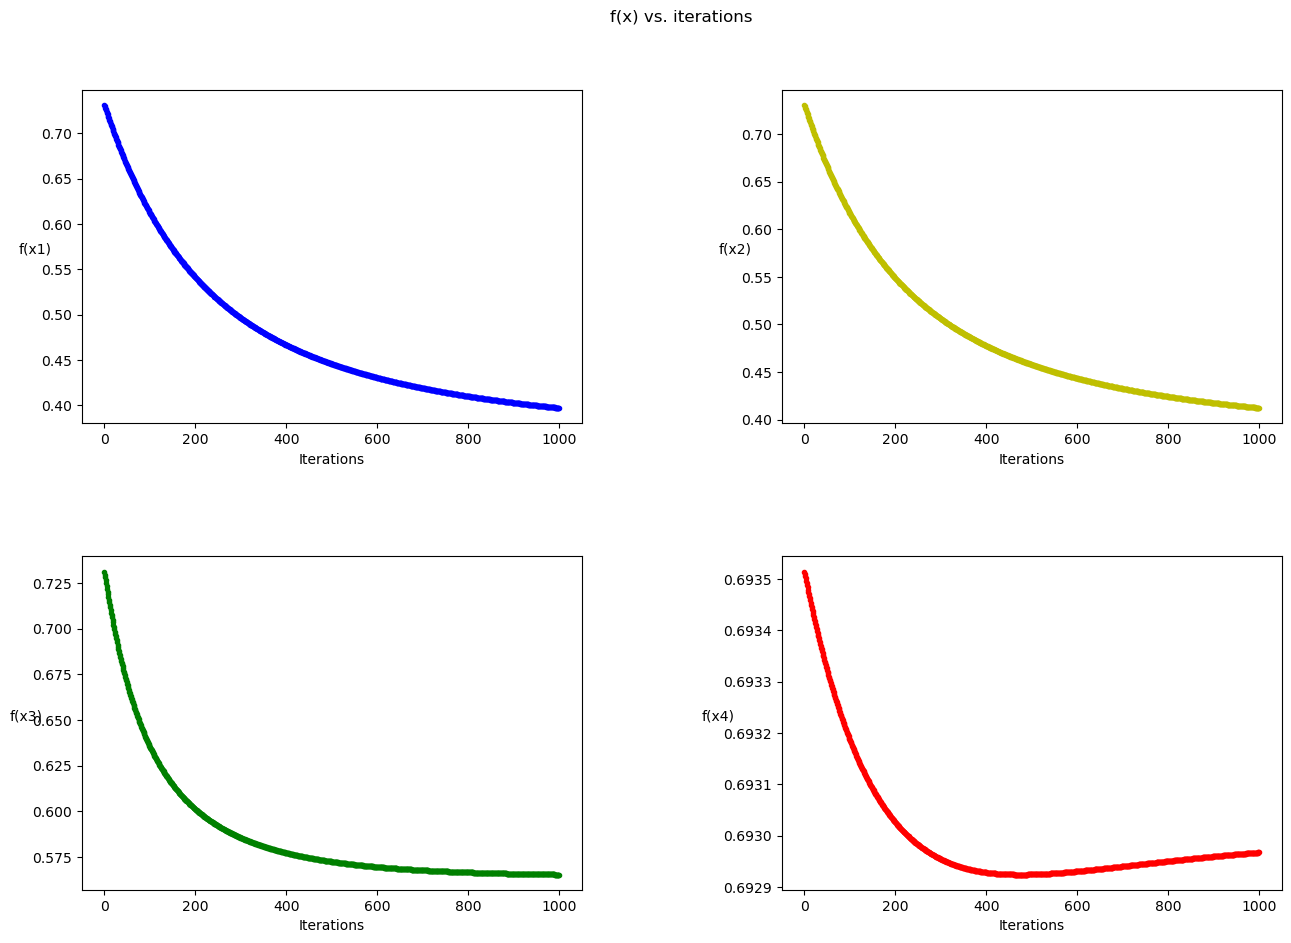

In [7]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    alpha =0.01
    n_iter = 1000

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 > 0:
            X0 = random.choice(temp)
        else:
            break
            
    # Set up plots
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, gradient_history, cost_history = gradient_descent(X1, Y1, X0, alpha, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, gradient_history, cost_history = gradient_descent(X2, Y2, X0, alpha, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, gradient_history, cost_history = gradient_descent(X3, Y3, X0, alpha, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, gradient_history, cost_history = gradient_descent(X4, Y4, X0, alpha, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    
    plt.show()


<h3><font color="black">Testing with an initial guess greater than one.</font></h3>

Initial Guess for synthetic 1: 1.163
Final X for synthetic 1: 2.417
Final cost for synthetic 1 using logistic regression: 0.383

Initial Guess for synthetic 2: 1.163
Final X for synthetic 2: 2.298
Final cost for synthetic 2 using logistic regression: 0.399

Initial Guess for synthetic 3: 1.163
Final X for synthetic 3: 0.748
Final cost for synthetic 3 using logistic regression: 0.563

Initial Guess for synthetic 4: 1.163
Final X for synthetic 4: 0.050
Final cost for synthetic 4 using logistic regression: 0.694



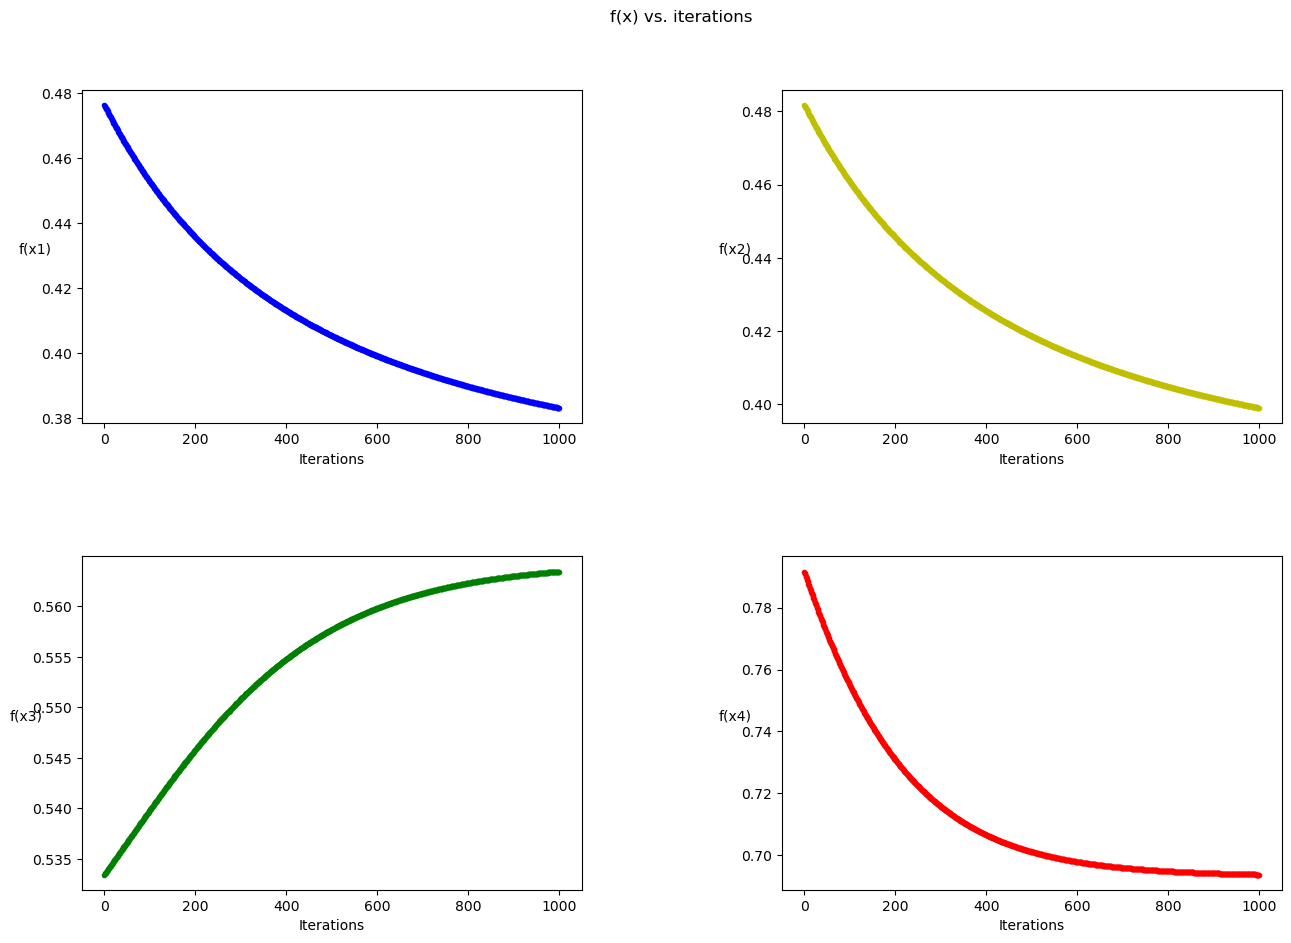

In [8]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    alpha =0.01
    n_iter = 1000

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 < 1:
            X0 = random.choice(temp)
        else:
            break

    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, gradient_history, cost_history = gradient_descent(X1, Y1, X0, alpha, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, gradient_history, cost_history = gradient_descent(X2, Y2, X0, alpha, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, gradient_history, cost_history = gradient_descent(X3, Y3, X0, alpha, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, gradient_history, cost_history = gradient_descent(X4, Y4, X0, alpha, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    
    plt.show()

<h3><font color="black">Testing with an initial guess greater than zero and less than one.</font></h3>

Initial Guess for synthetic 1: 0.212
Final X for synthetic 1: 2.181
Final cost for synthetic 1 using logistic regression: 0.394

Initial Guess for synthetic 2: 0.212
Final X for synthetic 2: 2.077
Final cost for synthetic 2 using logistic regression: 0.409

Initial Guess for synthetic 3: 0.212
Final X for synthetic 3: 0.733
Final cost for synthetic 3 using logistic regression: 0.565

Initial Guess for synthetic 4: 0.212
Final X for synthetic 4: -0.010
Final cost for synthetic 4 using logistic regression: 0.693



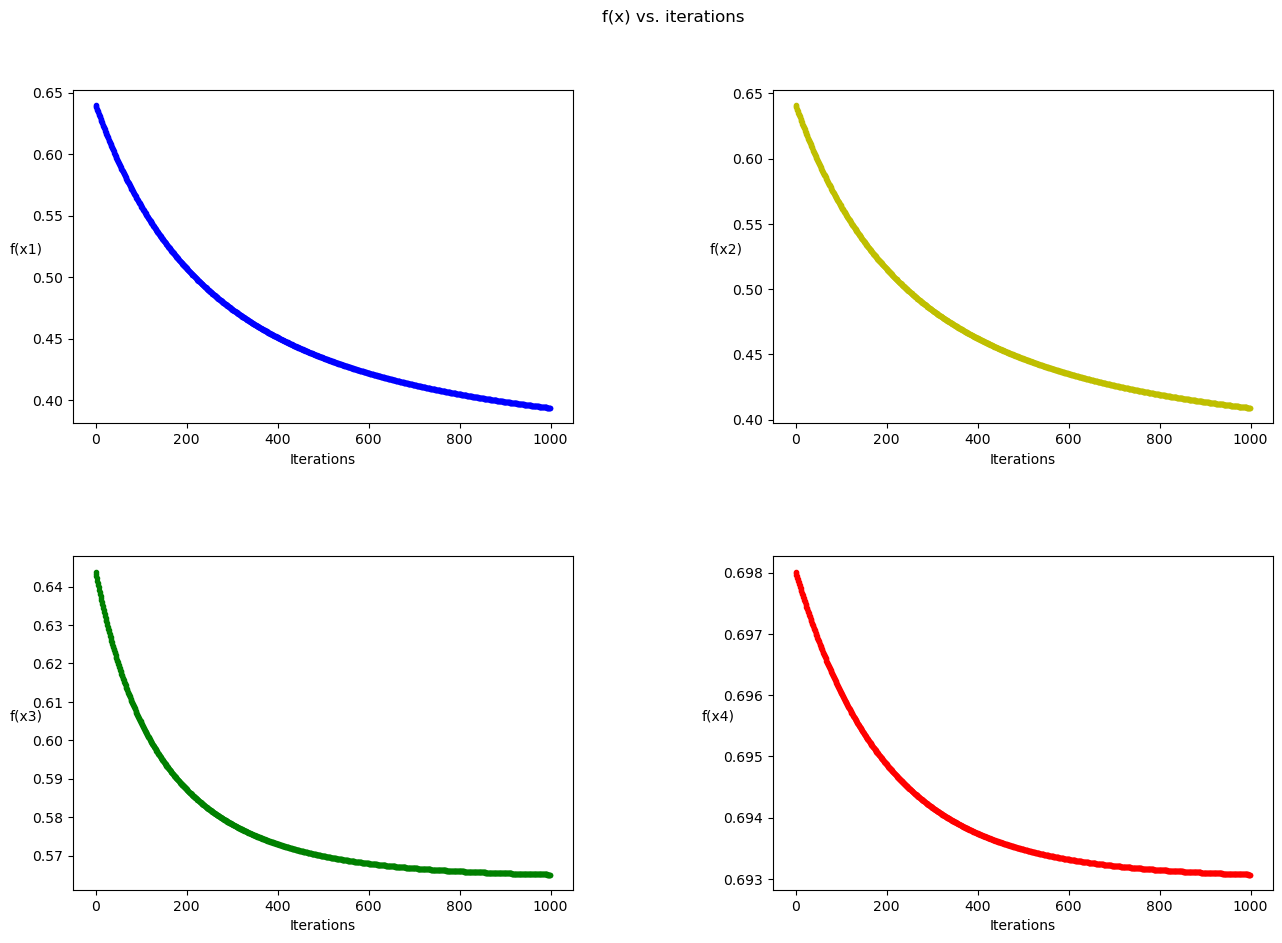

In [9]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    alpha =0.01
    n_iter = 1000

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 < 0 or X0 > 1:
            X0 = random.choice(temp)
        else:
            break

    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, gradient_history, cost_history = gradient_descent(X1, Y1, X0, alpha, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, gradient_history, cost_history = gradient_descent(X2, Y2, X0, alpha, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, gradient_history, cost_history = gradient_descent(X3, Y3, X0, alpha, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, gradient_history, cost_history = gradient_descent(X4, Y4, X0, alpha, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    
    plt.show()

<h3><font color="black">From analyzing the LDA and the logistic regression gradient descent algorithm we can clearly see that error decreases when we go from synthetic 1 to synthetic 4. For the LDA, this is seen as a decrease in percent error. For the logistic regression gradient descent algorithm we see a decrease in the cost function over time, and the final cost being lower. Meaning, less error.</font></h3>

<h3><font color="black">Part (c.) Convergence speed.</font></h3>

<h3><font color="black">Yes, there is a speed difference between synthetic data sets for convergence. I think that this is due to the intial random value chosen and the differences in the data sets. Each data set will respond differently to a random intial value.</font></h3>

<h2><font color="black">Problem 2</font></h2>

<h3><font color="black">The Newton's method algorithm is given by...</font></h3>

$$ x^{j+1} = x^j - (\nabla^2f(x))^{-1}\nabla f(x)|_{x=x^j} $$

<h3><font color="black">And to find the Hessian matrix we need...</font></h3>

$$ H_{ij} =  \frac{\partial^2 f(x)}{\partial x_i \partial x_j}$$

<h3><font color="black">Part (a.) Method definition.</font></h3>

In [10]:
def newtons_method(Xi, Yi, X, tol=1e-6, iterations=200):
    n = len(Yi)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        for j in range(2):
            # Predictions given by the sigmoid function
            predictions = 1 / (1+np.exp(-np.dot(Xi[j], X)))
            # The gradient of the cost function for logistic regression
            X = (1/n)*(Xi[j].T.dot((predictions - Yi)))
            #gradient = np.dot(Xi[j].T, (predictions - Yi)) / n
            # The Hessian of the cost function for logistic regression
            Hessian = (1/n)*np.dot(Xi[j].T, np.dot(np.diag(predictions * (1 - predictions)), Xi[j]))
            X = X - Hessian*X
            cost_history[i] = calculate_cost(Xi[j], Yi, X)

            # Check convergence
            if np.linalg.norm(X) < tol:
                break

    return X, cost_history

<h3><font color="black">Part (b.) Testing.</font></h3>

<h3><font color="black">Testing with a negative initial guess.</font></h3>

Initial Guess for synthetic 1: -0.189
Final X for synthetic 1: -0.254
Final cost for synthetic 1 using logistic regression: 0.764

Initial Guess for synthetic 2: -0.189
Final X for synthetic 2: -0.249
Final cost for synthetic 2 using logistic regression: 0.761

Initial Guess for synthetic 3: -0.189
Final X for synthetic 3: -0.226
Final cost for synthetic 3 using logistic regression: 0.756

Initial Guess for synthetic 4: -0.189
Final X for synthetic 4: 0.007
Final cost for synthetic 4 using logistic regression: 0.693



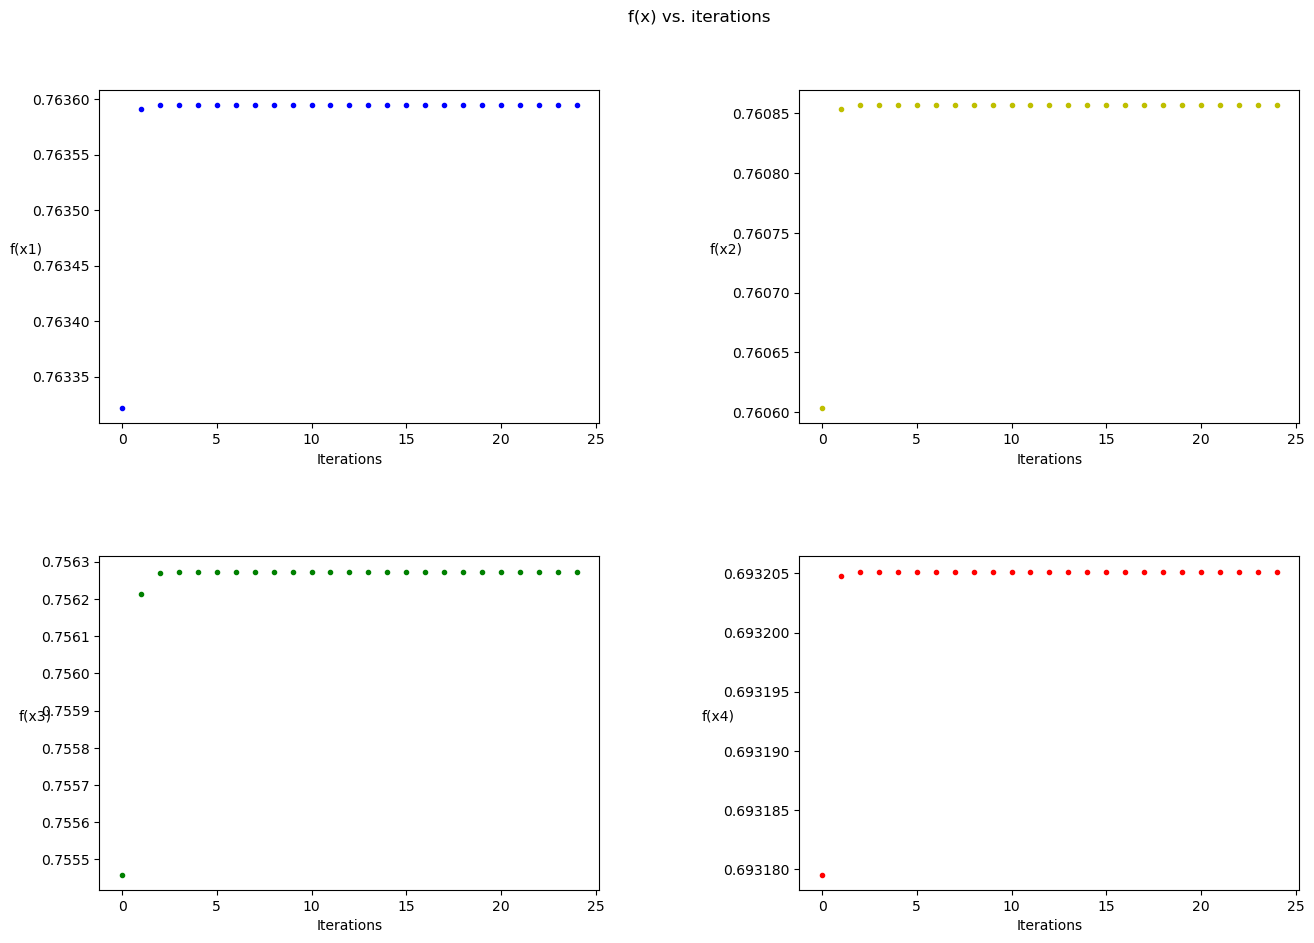

In [11]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    tol = 1e-6
    n_iter = 25

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 > 0:
            X0 = random.choice(temp)
        else:
            break
            
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, cost_history = newtons_method(X1, Y1, X0, tol, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = newtons_method(X2, Y2, X0, tol, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, cost_history = newtons_method(X3, Y3, X0, tol, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, cost_history = newtons_method(X4, Y4, X0, tol, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    
    plt.show()

<h3><font color="black">Testing with an initial guess greater than one.</font></h3>

Initial Guess for synthetic 1: 1.111
Final X for synthetic 1: -0.254
Final cost for synthetic 1 using logistic regression: 0.764

Initial Guess for synthetic 2: 1.111
Final X for synthetic 2: -0.249
Final cost for synthetic 2 using logistic regression: 0.761

Initial Guess for synthetic 3: 1.111
Final X for synthetic 3: -0.226
Final cost for synthetic 3 using logistic regression: 0.756

Initial Guess for synthetic 4: 1.111
Final X for synthetic 4: 0.007
Final cost for synthetic 4 using logistic regression: 0.693



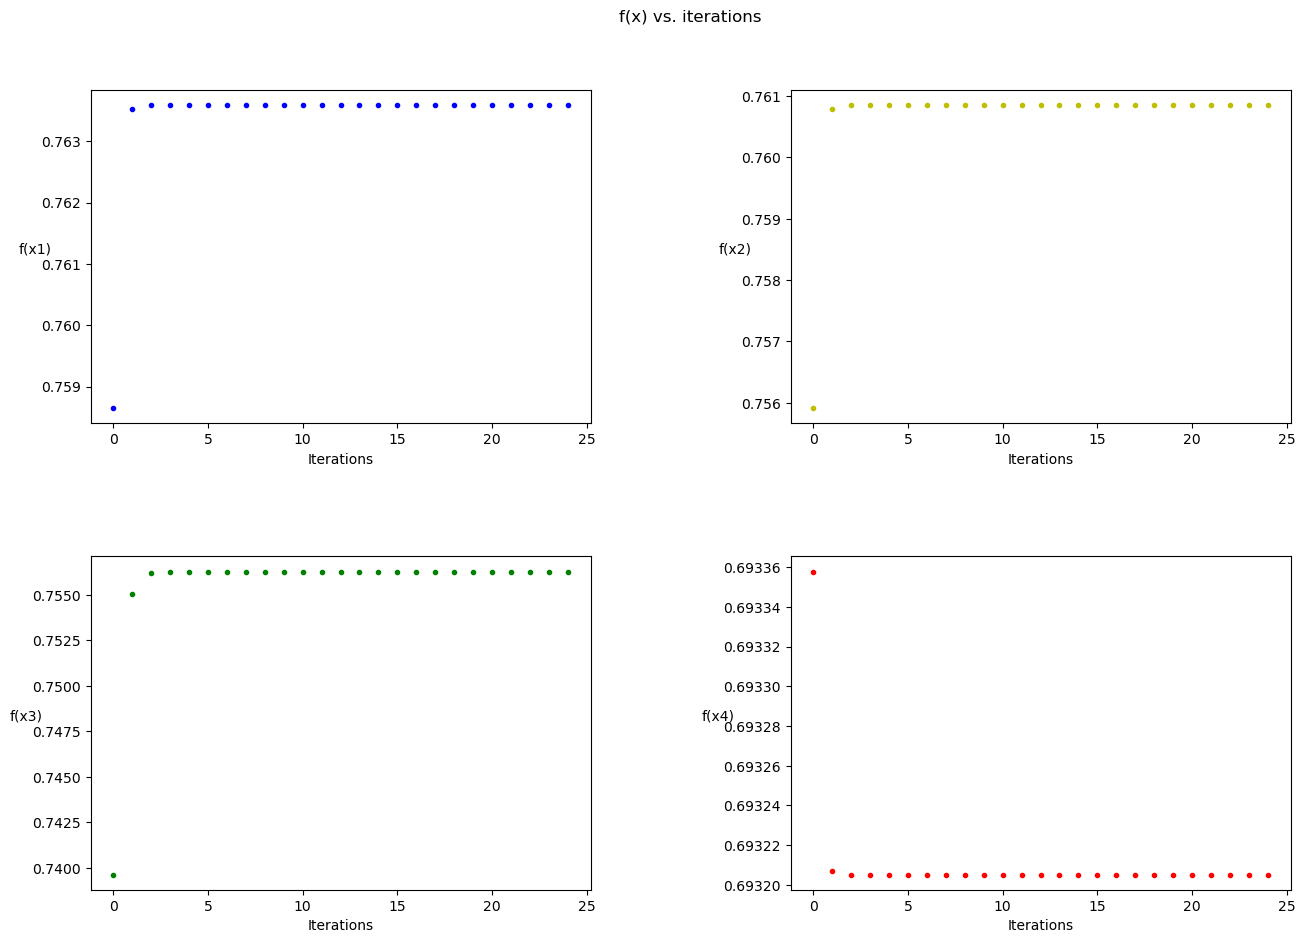

In [12]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    tol = 1e-6
    n_iter = 25

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 < 1:
            X0 = random.choice(temp)
        else:
            break
            
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, cost_history = newtons_method(X1, Y1, X0, tol, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = newtons_method(X2, Y2, X0, tol, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, cost_history = newtons_method(X3, Y3, X0, tol, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, cost_history = newtons_method(X4, Y4, X0, tol, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    
    plt.show()

<h3><font color="black">Testing with an initial guess greater than zero and less than one.</font></h3>

Initial Guess for synthetic 1: 0.857
Final X for synthetic 1: -0.254
Final cost for synthetic 1 using logistic regression: 0.764

Initial Guess for synthetic 2: 0.857
Final X for synthetic 2: -0.249
Final cost for synthetic 2 using logistic regression: 0.761

Initial Guess for synthetic 3: 0.857
Final X for synthetic 3: -0.226
Final cost for synthetic 3 using logistic regression: 0.756

Initial Guess for synthetic 4: 0.857
Final X for synthetic 4: 0.007
Final cost for synthetic 4 using logistic regression: 0.693



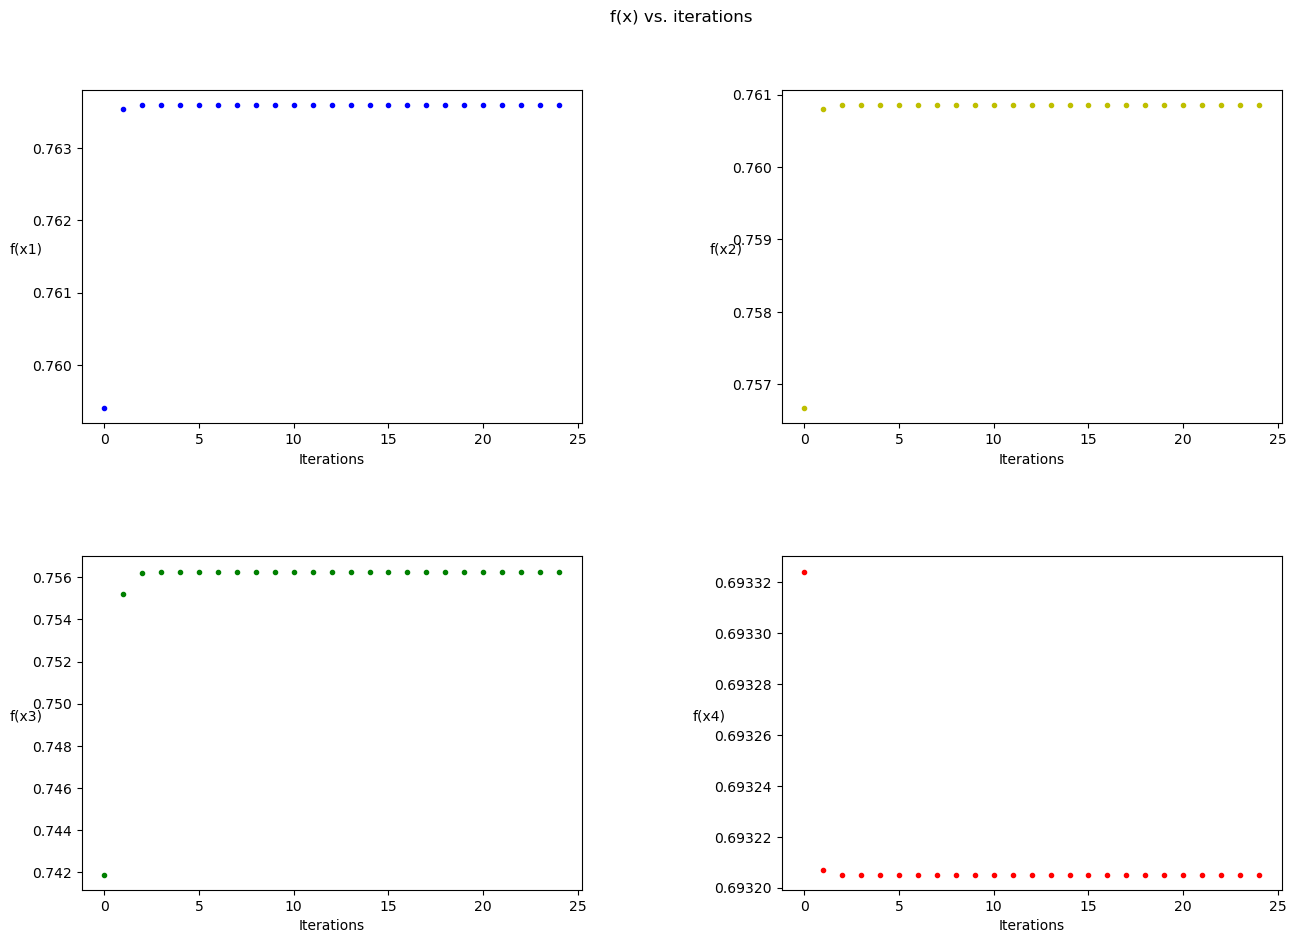

In [13]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    tol = 1e-6
    n_iter = 25

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 < 0 or X0 > 1:
            X0 = random.choice(temp)
        else:
            break
            
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, cost_history = newtons_method(X1, Y1, X0, tol, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = newtons_method(X2, Y2, X0, tol, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, cost_history = newtons_method(X3, Y3, X0, tol, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, cost_history = newtons_method(X4, Y4, X0, tol, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    
    plt.show()

<h3><font color="black">Newton's method seems to converge much faster than the gradient descent algoritm. For each data set it took less than 5 iterations, where as gradient descent took as many as 1000 iterations. Newton's method seems to be much more efficient.</font></h3>

<h2><font color="black">Problem 3</font></h2>

<h3><font color="black">For stochastic gradient descent, we simply choose an xi at random.</font></h3>

<h3><font color="black">Method definition.</font></h3>

In [14]:
def stocashtic_gradient_descent(Xi, Yi, X, alpha=0.01, iterations=200):
    n = len(Yi)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        cost = 0.0
        for j in range(n):
            rand_num = np.random.randint(0, 2)
            X_i = Xi[rand_num, :]
            Y_i = Yi[:]
            # Predictions given by the sigmoid function
            predictions = 1 / (1+np.exp(-np.dot(X_i, X)))
            # The gradient of the cost function for logistic regression
            X = X - (1/n)*alpha*(X_i.T.dot((predictions - Y_i)))
            cost += calculate_cost(X_i, Y_i, X)
        cost_history[i]  = cost/n
        
    return X, cost_history

<h3><font color="black">Testing with a negative initial guess.</font></h3>

C:\Users\anima\AppData\Local\Temp\ipykernel_7536\2702919859.py:7: RuntimeWarning: divide by zero encountered in log
  cost = -(1/n) * np.sum(Yi*np.log(predictions) + (1-Yi)*np.log(1-predictions))
C:\Users\anima\AppData\Local\Temp\ipykernel_7536\2702919859.py:5: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-Xi.dot(X)))
C:\Users\anima\AppData\Local\Temp\ipykernel_7536\2702919859.py:7: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/n) * np.sum(Yi*np.log(predictions) + (1-Yi)*np.log(1-predictions))


Initial Guess for synthetic 1: -0.338
Final X for synthetic 1: -1575.565
Final cost for synthetic 1 using logistic regression: nan

Initial Guess for synthetic 2: -0.338
Final X for synthetic 2: -1779.656
Final cost for synthetic 2 using logistic regression: nan

Initial Guess for synthetic 3: -0.338
Final X for synthetic 3: -8833.778
Final cost for synthetic 3 using logistic regression: nan

Initial Guess for synthetic 4: -0.338
Final X for synthetic 4: -6898.281
Final cost for synthetic 4 using logistic regression: nan



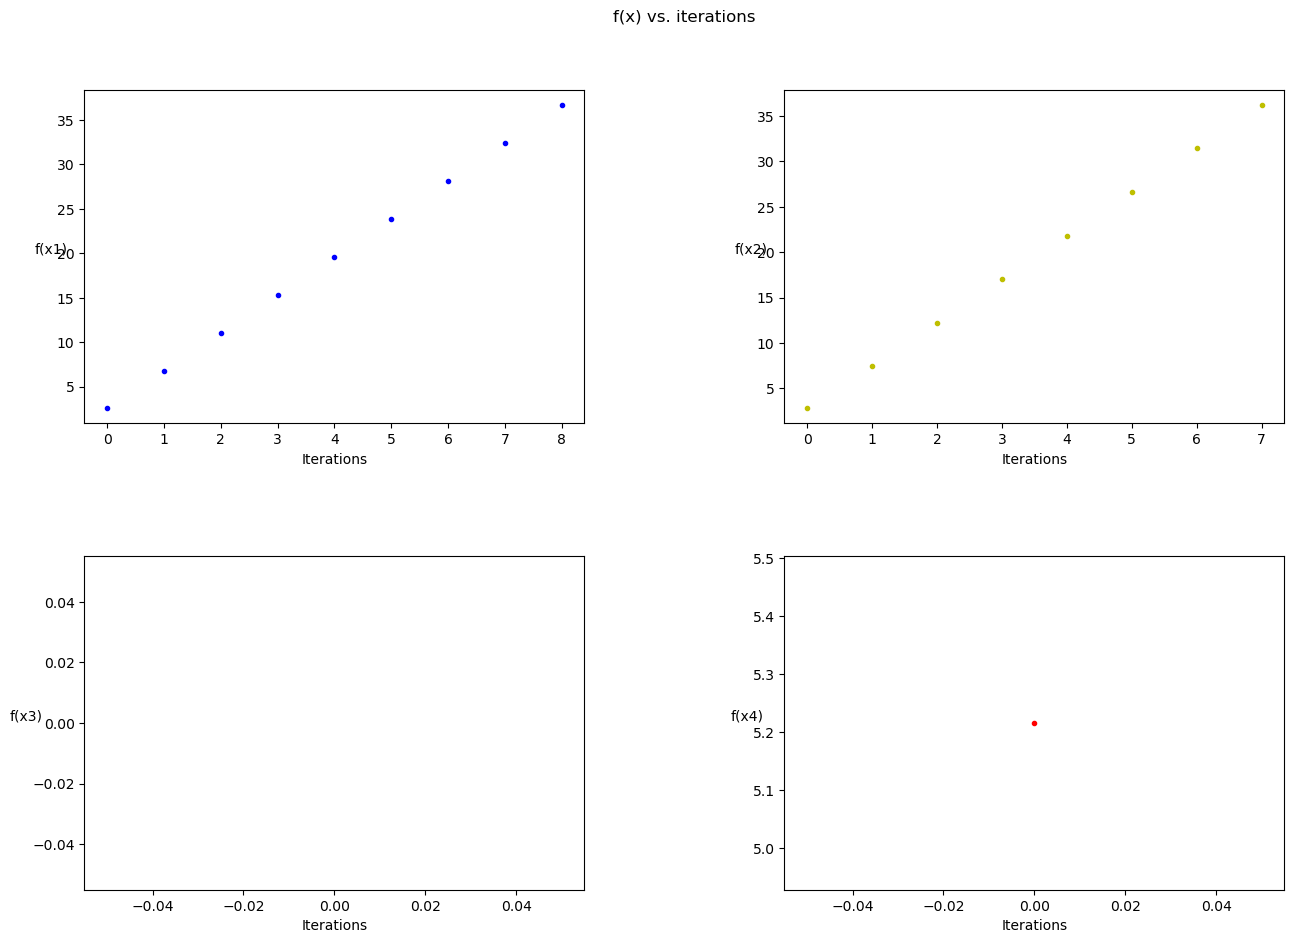

In [15]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    alpha =0.01
    n_iter = 200

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 > 0:
            X0 = random.choice(temp)
        else:
            break
        
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, cost_history = stocashtic_gradient_descent(X1, Y1, X0, alpha, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = stocashtic_gradient_descent(X2, Y2, X0, alpha, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, cost_history = stocashtic_gradient_descent(X3, Y3, X0, alpha, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, cost_history = stocashtic_gradient_descent(X4, Y4, X0, alpha, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    plt.show()


<h3><font color="black">Testing with an initial guess greater than one.</font></h3>

Initial Guess for synthetic 1: 1.145
Final X for synthetic 1: 3.896
Final cost for synthetic 1 using logistic regression: 0.372

Initial Guess for synthetic 2: 1.145
Final X for synthetic 2: 3.311
Final cost for synthetic 2 using logistic regression: 0.402

Initial Guess for synthetic 3: 1.145
Final X for synthetic 3: 0.740
Final cost for synthetic 3 using logistic regression: 0.621

Initial Guess for synthetic 4: 1.145
Final X for synthetic 4: -0.025
Final cost for synthetic 4 using logistic regression: 0.693



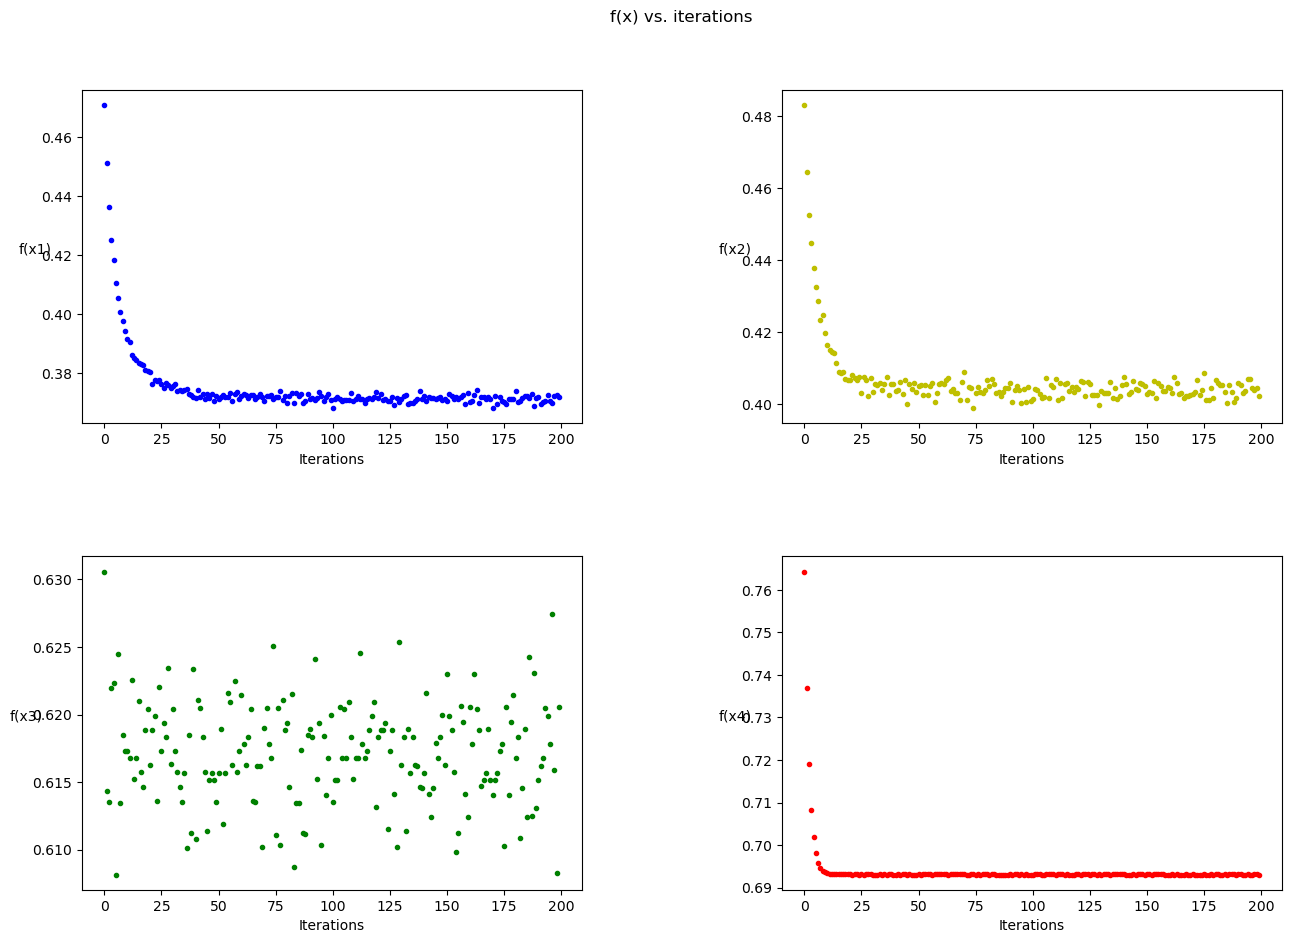

In [14]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    alpha =0.01
    n_iter = 200

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 < 1:
            X0 = random.choice(temp)
        else:
            break
        
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, cost_history = stocashtic_gradient_descent(X1, Y1, X0, alpha, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = stocashtic_gradient_descent(X2, Y2, X0, alpha, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, cost_history = stocashtic_gradient_descent(X3, Y3, X0, alpha, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, cost_history = stocashtic_gradient_descent(X4, Y4, X0, alpha, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    plt.show()


<h3><font color="black">Testing with an initial guess greater than zero and less than one.</font></h3>

Initial Guess for synthetic 1: 0.209
Final X for synthetic 1: 3.898
Final cost for synthetic 1 using logistic regression: 0.371

Initial Guess for synthetic 2: 0.209
Final X for synthetic 2: 3.307
Final cost for synthetic 2 using logistic regression: 0.402

Initial Guess for synthetic 3: 0.209
Final X for synthetic 3: 0.731
Final cost for synthetic 3 using logistic regression: 0.621

Initial Guess for synthetic 4: 0.209
Final X for synthetic 4: -0.024
Final cost for synthetic 4 using logistic regression: 0.693



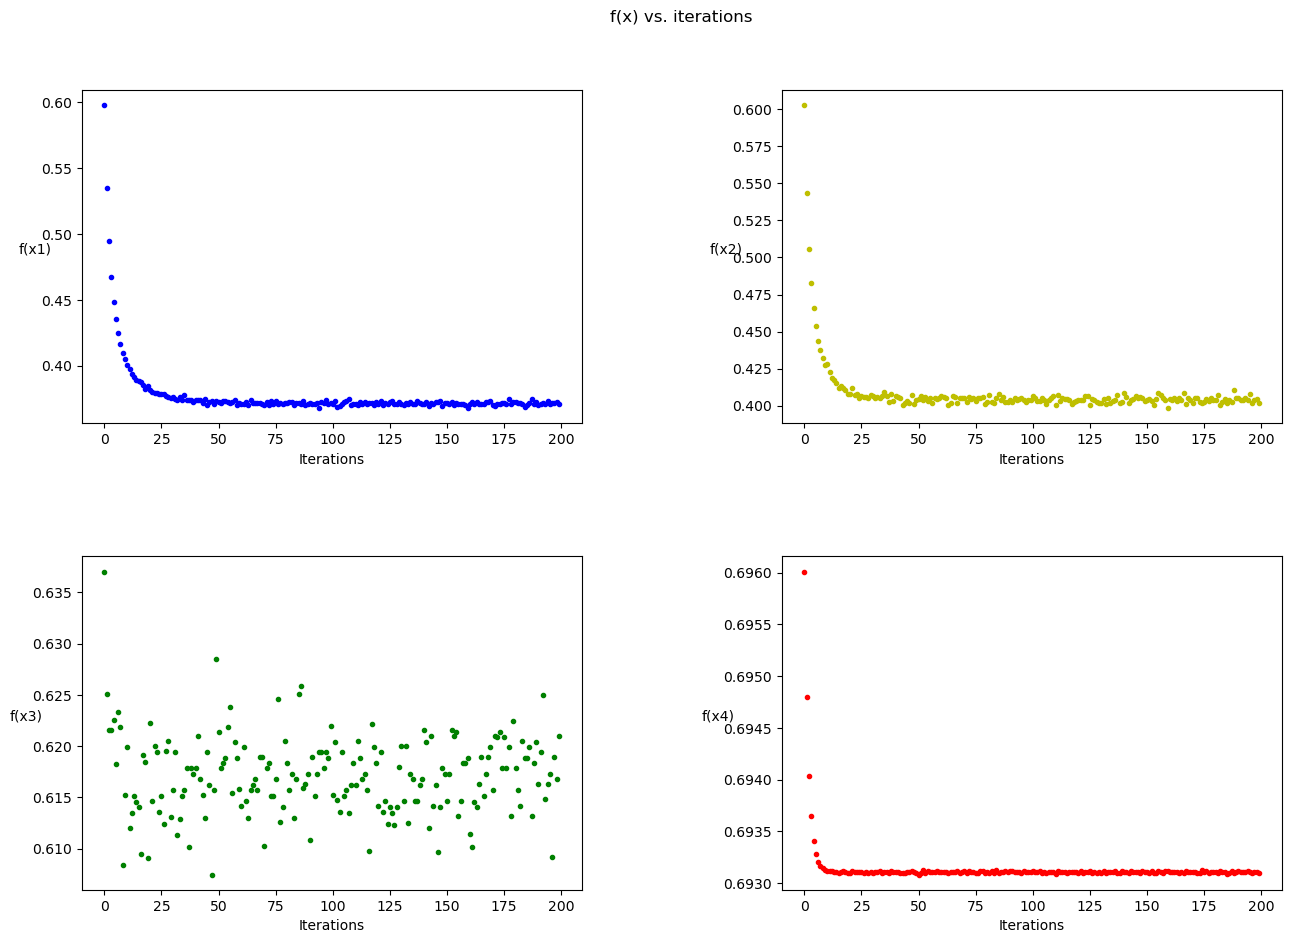

In [15]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    alpha =0.01
    n_iter = 200

    # Initial random guess, define x_n+1 in the gradient descent method
    temp = random.choice(X1)
    X0 = random.choice(temp)
    
    for i in range(n_iter):
        if X0 < 0 or X0 > 1:
            X0 = random.choice(temp)
        else:
            break
        
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('f(x) vs. iterations')
    
    X, cost_history = stocashtic_gradient_descent(X1, Y1, X0, alpha, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final X for synthetic 1: {:0.3f}'.format(X))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = stocashtic_gradient_descent(X2, Y2, X0, alpha, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final X for synthetic 2: {:0.3f}'.format(X))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'y.')
    
    X, cost_history = stocashtic_gradient_descent(X3, Y3, X0, alpha, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final X for synthetic 3: {:0.3f}'.format(X))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'g.')
    
    X, cost_history = stocashtic_gradient_descent(X4, Y4, X0, alpha, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final X for synthetic 4: {:0.3f}'.format(X))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'r.')
    
    plt.show()
